# 인공지능개론 - 202334716 이예나 

타이타닉 데이터 분류(DT, RF, SVM, LR, KNN) / 

## 파일(데이터) 불러오기

### 1. 로컬에서 파일 불러오기

In [6]:
import pandas as pd

# 타이타닉 데이터 CSV 파일 읽기
file_path = "/Users/yenalee/Desktop/workplace/AI_2025-1/week2/titanic.csv"  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head)
print(df.columns)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

### 2. 웹 주소(깃허브)에서 파일 불러오기

In [8]:
import pandas as pd

# GitHub raw CSV 파일 URL
file_url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"

# CSV 파일 읽기
df = pd.read_csv(file_url)

# 데이터프레임 확인
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 라이브러리 import

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# survived 컬럼의 카운트 확인
survived_count = df['Survived'].value_counts()
print(survived_count)

Survived
0    549
1    342
Name: count, dtype: int64


## 데이터 전처리

### 결측치 확인 (isnull)
- 0이면 결측치가 없다는 뜻

In [14]:
# null 값 체크
null_counts = df.isnull().sum()
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 수치 매핑 (LabelEncoder)
남성 = 1, 여성 = 0

In [16]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
encoder = LabelEncoder()

# 특정 컬럼만 선택하여 LabelEncoder 적용
columns_to_encode = ['Sex']  # 인코딩할 컬럼 리스트

for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

# 결과 출력
print(df[['Sex']].head())

   Sex
0    1
1    0
2    0
3    0
4    1


### 불필요한 columns 제거

In [18]:
# 특정 열 삭제
df = df.drop(columns=['Name', 'Ticket', 'Embarked', 'Cabin'])  # 삭제할 열 이름을 리스트로 전달

# 결과 출력
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    1  22.0      1      0   7.2500
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
4            5         0       3    1  35.0      0      0   8.0500


### Age 결측치를 평균값(mean)으로 대체(fillna)

In [20]:
# Age 컬럼의 평균값 계산, 정수 변환
mean_age = int(round(df['Age'].mean()))  # 평균값을 반올림하고 정수로 변환

# Age 컬럼의 결측값을 평균값으로 채우기
df['Age'] = df['Age'].fillna(mean_age)

# 'Age' 컬럼을 정수형으로 변환
df['Age'] = df['Age'].astype(int)

# 결과 출력
print(df[['Age']].head())

   Age
0   22
1   38
2   26
3   35
4   35


### 결측치 재확인

In [22]:
# null 값 체크
null_counts = df.isnull().sum()
print(null_counts)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


### Survived 컬럼 카운트 및 그래프

In [24]:
# survived 컬럼의 카운트 확인
survived_count = df['Survived'].value_counts()
print(survived_count)

Survived
0    549
1    342
Name: count, dtype: int64


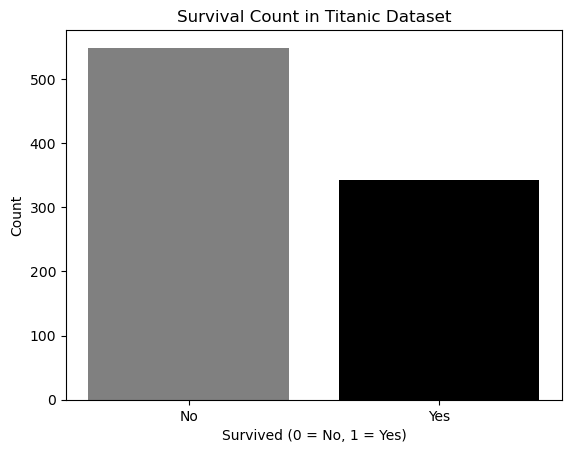

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.bar(survived_count.index, survived_count.values, color=['gray', 'black'])

# 그래프 제목 및 레이블 설정
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Count in Titanic Dataset")

# x축 눈금 이름 설정
plt.xticks([0, 1], ['No', 'Yes'])

# 그래프 출력
plt.show()

## 데이터프레임 확인

In [28]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,7.2500
1,2,1,1,0,38,1,0,71.2833
2,3,1,3,0,26,0,0,7.9250
3,4,1,1,0,35,1,0,53.1000
4,5,0,3,1,35,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000
887,888,1,1,0,19,0,0,30.0000
888,889,0,3,0,30,1,2,23.4500
889,890,1,1,1,26,0,0,30.0000


## 데이터 분류 (DT, RF, SVM, LR, KNN)

### 데이터 분할(학습 데이터, 테스트 데이터)

In [30]:
# 데이터 분할
x = df.drop(columns=['Survived'])
y = df['Survived'] 

# 학습 데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 데이터 정규화

In [32]:
# 데이터 정규화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # 학습 데이터 표준화
x_test = scaler.transform(x_test)  # 테스트 데이터 표준화

### 모델 학습 및 정확도(Accuracy) 확인

#### Decision Tree 모델 학습 및 평가

In [34]:
dt_model = DecisionTreeClassifier()   # 결정 트리(Decision Tree) 모델 생성
dt_model.fit(x_train, y_train)        # 모델 학습 (훈련 데이터로 학습 진행)
dt_pred = dt_model.predict(x_test)    # 테스트 데이터를 사용하여 예측 수행

print("\n[결정 트리(DT] 분류 보고서 :")
print(classification_report(y_test, dt_pred))
print(f"결정 트리(DT) 정확도 : {accuracy_score(y_test, dt_pred):.4f}")


[결정 트리(DT] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       105
           1       0.68      0.62      0.65        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179

결정 트리(DT) 정확도 : 0.7207


#### Random Forest 모델 학습 및 평가

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print("\n[랜덤 포레스트(RF)] 분류 보고서 :")
print(classification_report(y_test, rf_pred))
print(f"랜덤 포레스트(RF) 정확도 : {accuracy_score(y_test, rf_pred):.4f}")


[랜덤 포레스트(RF)] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

랜덤 포레스트(RF) 정확도 : 0.8156


#### SVM 모델 학습 및 평가

In [38]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("\n[SVM] 분류 보고서 :")
print(classification_report(y_test, svm_pred))
print(f"SVM 정확도 : {accuracy_score(y_test, svm_pred):.4f}")


[SVM] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

SVM 정확도 : 0.8101


#### Logistic Regression 모델 학습 및 평가

In [41]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print("\n[로지스틱 회귀(LR)] 분류 보고서 :")
print(classification_report(y_test, lr_pred))
print(f"로지스틱 회귀(LR) 정확도 : {accuracy_score(y_test, lr_pred):.4f}")


[로지스틱 회귀(LR)] 분류 보고서 :
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

로지스틱 회귀(LR) 정확도 : 0.8101


#### K-NN 모델 학습 및 평가

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [93]:
# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 필요함)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
# K-NN 모델 초기화
k = 3  # k 값은 사용자에 맞게 설정할 수 있습니다.
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 훈련
knn.fit(x_train, y_train)

# 예측
y_pred = knn.predict(x_test)

print(y_pred[0:10]) # 예측 데이터 값 확인

[0 0 0 1 0 1 1 0 1 1]


In [97]:
# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")

Accuracy: 0.7989


In [99]:
print(y_test[0:10]) # 테스트 데이터 값 확인

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64


#### K값 튜닝 그래프

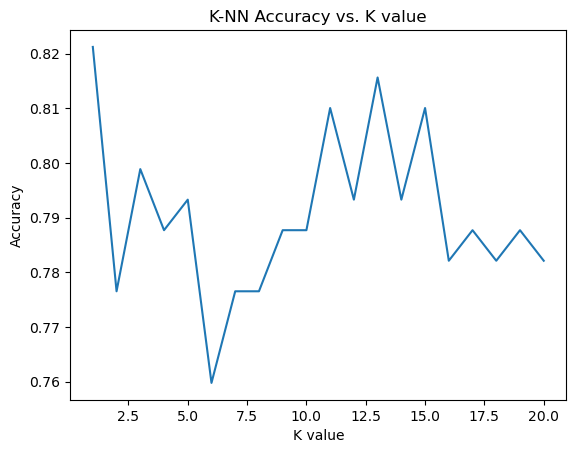

In [102]:
# 여러 K 값에 대해 정확도 확인
k_values = range(1, 21)  # 1부터 20까지의 K 값
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 정확도를 그래프으로 시각화
plt.plot(k_values, accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy vs. K value')
plt.show()

## confusion matrix(혼동행렬) 확인
- 모델이 예측한 결과와 실제 결과를 비교하여 만들어지는 행렬

- Confusion matrix의 구성

True Positive (TP): 실제값이 Positive(or True)이고 모델이 예측한 값이 Positive인 경우

False Positive (FP): 실제값이 Negative(or False)이고 모델이 예측한 값이 Positive인 경우

False Negative (FN): 실제값이 Positive(or False)이고 모델이 예측한 값이 Negative인 경우

True Negative (TN): 실제값이 Negative(or True)이고 모델이 예측한 값이 Negative인 경우

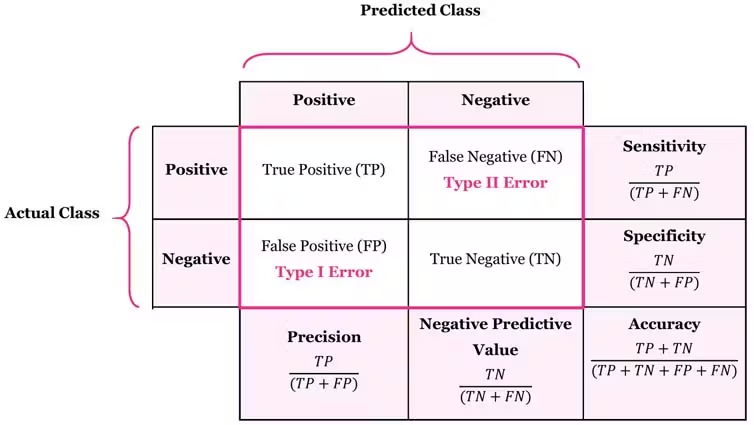

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion Matrix:
 [[91 14]
 [25 49]]


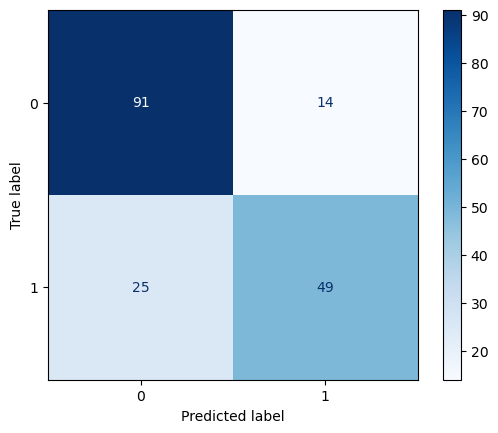

In [106]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:\n", cm)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 평가 지표 확인

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 실제 값(y_test)과 예측값(y_pred)을 비교하여 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 출력
print("Confusion Matrix:")
print(cm)
print("\n정확도 (Accuracy):", accuracy) # 모델이 전체 샘플 중 올바르게 예측한 비율
print("정밀도 (Precision):", precision) # 모델이 "1(positive)"이라고 예측한 것 중 실제로 "1"인 비율
print("재현율 (Recall):", recall) # 실제 "1"인 것 중에서 모델이 올바르게 "1"이라고 예측한 비율

Confusion Matrix:
[[91 14]
 [25 49]]

정확도 (Accuracy): 0.7821229050279329
정밀도 (Precision): 0.7777777777777778
재현율 (Recall): 0.6621621621621622
